# Overview

*PredictiveHire’s FirstInterview™ is a text-chat based candidate screening system where job
applicants answer 5-7 situational judgement and past behaviour questions. Responses to these
structured interview questions are then analysed by PredictiveHire AI (PHAI™), a Natural Language
Processing (NLP) and machine learning based evaluation algorithm, to generate a candidate
“suitability recommendation” (i.e. in the form of “Yes”, “No”, or “Maybe”) used in screening
candidates. In addition to the “suitability recommendation”, PHAI also generates personality and
behaviour-based traits of the candidates to further assist the recruiters and hiring managers to make
decisions.*

*You will be provided with a mock dataset that is similar to the actual datasets from FirstInterview
systems. Teams at PredictiveHire are keen to understand (1) how the product performs against
different KPIs or key factors, (2) insights that will help make business decisions.*


### Key findings:

* Most candidates complete the FirstInterview in less than an hour

* The number of completed interviews varies of the year. For 2020 September had the most completed.

* Overall there is a dropout rate of 16%. Drop out rate depends on the job. For example jobId 861642113 has a high drop-out rate of 26%.

* "Job Listing Public Title 65" was the most popular job title with 9756 candidates.

* For the ten most popular jobIds of "Job Listing Public Title 65", recommended candidates were more likely to be satified with FirstInterview.

* jobId 863203965 does not effectively shortlist candidates with less than 20% of candidates receiving "No" recommendations. In addition, this job has lower customer satisfation score, therefore, the FirstInterview process for this job should be reviewed.

* Some jobs attract unequal gender ratios. I  recommend adjusting FirstInterview to attract of a gender-balance especially for jobId 861612876 and 865072021 (first and fifth from the left).

* for "Job Listing Public Title 65", recommended canditates tend to be team players, self-aware, resourceful, driven, critical thinkers, and accountable.
       
* jobId 865072021 does not attract team players. I would recommend 865072021 (blue) to try to attract more team players.

* jobId 865423784 doesn't attract as much resourcefulness or critical thinking than the others. 

* jobId 870885479 tends to attract less self-aware personalilities than average.


The following notebook shows the process I took to get the data, clean it, investigate it, and produce visualisations and interpretations.

I chose to focus on a subset of jobs from the most popular job title, but I think it could've also been helpful to focus on a set all from the same recruiter.



   # Getting the data
   
   First I want to have a look at what is in the files. 
   Before uploading the files I converted the excel files to csv.

In [1]:
# Import all the packages needed for this analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [2]:
# Read in the files
product_F_CSAT = pd.read_excel('Documents/1_product_F_CSAT.xlsx', index_col=0)
main_data_source_A = pd.read_excel('Documents/2_main_data_source_A.xlsx', index_col=0)
main_data_source_B = pd.read_excel('Documents/3_main_data_source_B.xlsx') # dropped out candidates do not have ids so there is no clear index column

# Viewing the first file

Here is the first file. It uses 'prediction_id' as the candidate ID. 

The two values are two different metrics candidates' feedback for FirstInterview.

In [3]:
# View the first file in the notebook here
product_F_CSAT

comment_sentiment  polarity
prediction_id                                              
5d675f6d2db7140100105dcb  Unknown Unknown Unknown  0.287500
5d6765aa1c75cd01004f3b6a  Unknown Unknown Unknown  0.045833
5d676e591c75cd01004f3b86  Unknown Unknown Unknown  0.150000
5d6779b52db7140100105e22  Unknown Unknown Unknown  0.562500
5d686a692db7140100105fff  Unknown Unknown Unknown  0.213889
...                                           ...       ...
5f4df51985b1d301006ab468                 positive  0.250000
5f89421847ce990100391356                 positive  0.500000
5f80f0c3b517f0010085d12e                 positive  0.425000
5f3e190e50637201009dab6d                 positive  0.700000
5f2a90fe254e1d01001a7ef0                 positive -0.020000

[9051 rows x 2 columns]

Looking further at the values of 'comment sentiment' there is obviously overall mostly positive sentiment. 

There are a small amount of values which are not positive, neutral, or negative. These may need to be cleaned for analysis.

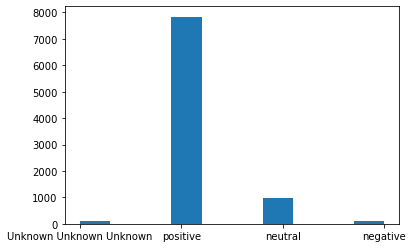

In [4]:
# Have a look at the values of 'comment sentiment'
# Identify invalid values and common values
plt.hist(product_F_CSAT['comment_sentiment']);

In [5]:
product_F_CSAT['comment_sentiment'].value_counts()

positive                   7838
neutral                     981
negative                    124
Unknown Unknown Unknown     108
Name: comment_sentiment, dtype: int64

In [6]:
# The "Unknown Unknown Unknown" comment sentiment could be replaced with NaN.
# product_F_CSAT['comment_sentiment'][product_F_CSAT['comment_sentiment']=="Unknown Unknown Unknown"] = np.nan

At first glance, polarity tells a similar story to comment sentiment; the vast majority of feedback is positive (greater than zero). 

The two metrics must be calculated differently becuse there are more polarity values greater than zero than positive comment sentiments.

8228

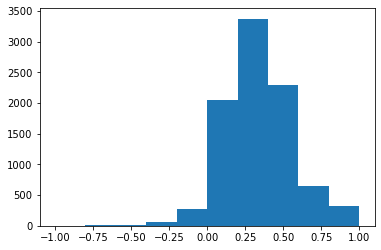

In [7]:
# Check out the values of polarity
plt.hist(product_F_CSAT['polarity'])
np.sum(product_F_CSAT['polarity']>0)

# Viewing main_data_source_A

This data has 24 attributes.

These attributes include if candidates were recommended, personal qualities like gender and personality traits, and characteristics of their responses including time, word count and plagiarism.


In [8]:
main_data_source_A.columns

Index(['cohortId', 'cohortName', 'submittedAt', 'timeTaken', 'Recommend',
       'ftq_count', 'total_words', 'plagiarismTest', 'profanityTest',
       'plagiarismType', 'gender', 'hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general', 'easl', 'trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile'],
      dtype='object')

In [9]:
main_data_source_A

cohortId             cohortName  \
prediction_id                                                               
5d674dfb1c75cd01004f3b00  5d661dcfbd98810100216450   Job Listing Title 79   
5d674e572db7140100105d71  5d661dcfbd98810100216450   Job Listing Title 79   
5d67554d2db7140100105d8d  5d661dcfbd98810100216450   Job Listing Title 79   
5d6757e12db7140100105da7  5d661dcfbd98810100216450   Job Listing Title 79   
5d675ce51c75cd01004f3b46  5d661dcfbd98810100216450   Job Listing Title 79   
...                                            ...                    ...   
5edc32bd0a0d55010034e48c  5ed8c75cb14bd50100cea142  Job Listing Title 282   
5f7de8adb517f00100859da9  5f752f19a0619401000c2cc6  Job Listing Title 469   
5f81002bb517f0010085d1c2  5f810027a06194010018ab03  Job Listing Title 469   
5f7c0b6047ce990100381d0d  5f7bbb06a06194010012a204  Job Listing Title 469   
5efe9ad6a40c380100b7f349  5efda778571fb701005e1a67  Job Listing Title 157   

                                     submittedAt  timeTaken Recommend  \
prediction_id                                                           
5d674dfb1c75cd01004f3b00 2019-08-29 04:00:57.755      18.99       YES   
5d674e572db7140100105d71 2019-08-29 04:02:29.284      53.25       YES   
5d67554d2db7140100105d8d 2019-08-29 04:32:10.036      62.98     MAYBE   
5d6757e12db7140100105da7 2019-08-29 04:43:10.984      26.59        NO   
5d675ce51c75cd01004f3b46 2019-08-29 05:04:34.738      52.07        NO   
...                                          ...        ...       ...   
5edc32bd0a0d55010034e48c 2020-06-07 00:20:07.718      52.48        NO   
5f7de8adb517f00100859da9 2020-10-07 16:11:00.472     193.17        NO   
5f81002bb517f0010085d1c2 2020-10-10 00:28:21.816      10.57        NO   
5f7c0b6047ce990100381d0d 2020-10-06 06:14:48.852      19.76        NO   
5efe9ad6a40c380100b7f349 2020-07-03 02:41:20.855      34.56        NO   

                          ftq_count  total_words  plagiarismTest  \
prediction_id                                                      
5d674dfb1c75cd01004f3b00          6          188              -1   
5d674e572db7140100105d71          6          241              -1   
5d67554d2db7140100105d8d          6          231              -1   
5d6757e12db7140100105da7          6          159              -1   
5d675ce51c75cd01004f3b46          6          266              -1   
...                             ...          ...             ...   
5edc32bd0a0d55010034e48c          6          432               0   
5f7de8adb517f00100859da9          6          588               0   
5f81002bb517f0010085d1c2          6          155               0   
5f7c0b6047ce990100381d0d          6          320               0   
5efe9ad6a40c380100b7f349          6          368               0   

                          profanityTest plagiarismType  ...  \
prediction_id                                           ...   
5d674dfb1c75cd01004f3b00             -1           NONE  ...   
5d674e572db7140100105d71             -1           NONE  ...   
5d67554d2db7140100105d8d             -1           NONE  ...   
5d6757e12db7140100105da7             -1           NONE  ...   
5d675ce51c75cd01004f3b46             -1           NONE  ...   
...                                 ...            ...  ...   
5edc32bd0a0d55010034e48c             -1       NEGATIVE  ...   
5f7de8adb517f00100859da9              0       NEGATIVE  ...   
5f81002bb517f0010085d1c2              0       NEGATIVE  ...   
5f7c0b6047ce990100381d0d              0       NEGATIVE  ...   
5efe9ad6a40c380100b7f349              0       NEGATIVE  ...   

                         hexaco_emotionality_general  \
prediction_id                                          
5d674dfb1c75cd01004f3b00                    0.446802   
5d674e572db7140100105d71                    0.434395   
5d67554d2db7140100105d8d                    0.448441   
5d6757e12db7140100105da7                    0.448114   
5d675ce51c75cd01004f3b46                    0.435

A brief look at attributes in this table:

In [10]:
main_data_source_A['cohortName'].value_counts()

Job Listing Title 469    5782
Job Listing Title 47      319
Job Listing Title 218      90
Job Listing Title 5        90
Job Listing Title 414      86
                         ... 
Job Listing Title 94        1
Job Listing Title 149       1
Job Listing Title 276       1
Job Listing Title 462       1
Job Listing Title 310       1
Name: cohortName, Length: 407, dtype: int64

In [11]:
main_data_source_A['cohortId'].value_counts()

5f11a4f19bd4080100843590    90
5e86e5c8d11593010081678a    90
5f5b1a9c589dcc0100454cbc    89
5e880d91c2ce11010001815b    86
5f21075e1c24de0100dafbfc    83
                            ..
5f46dbce91d82c0100a51cfc     1
5eb10bf22e85fc0100eb1bd3     1
5f74b822003294010091cd28     1
5f51ffe6cf425e01001d7686     1
5f6d4464a061940100046a7d     1
Name: cohortId, Length: 984, dtype: int64

In [12]:
# what are the native languages which are not english?
main_data_source_A['easl'].value_counts()

NOT_GIVEN                   6170
No other language spoken    4213
Hindi                        264
Arabic                        98
Italian                       94
Greek                         58
French                        55
Afrikaans                     52
German                        41
Spanish                       40
Vietnamese                    36
Cantonese                     30
Gujarati                      28
Croatian                      25
Japanese                      24
Indonesian                    22
Samoan                        21
Mandarin                      21
Turkish                       18
Nepali                        15
Bengali                       15
Portuguese                    15
Bosnian                       14
Farsi                         13
Dutch                         11
Maori                         11
Korean                        10
Thai                           9
Swahili                        7
Burmese                        7
AUSLAN    

In [13]:
easl = main_data_source_A['easl'][(main_data_source_A['easl']!= "NOT_GIVEN") & (main_data_source_A['easl']!= "No other language spoken")]
print("English is reported as a second language for {:.0%} of candidates.".format(len(easl)/len(main_data_source_A['easl'])))

English is reported as a second language for 12% of candidates.


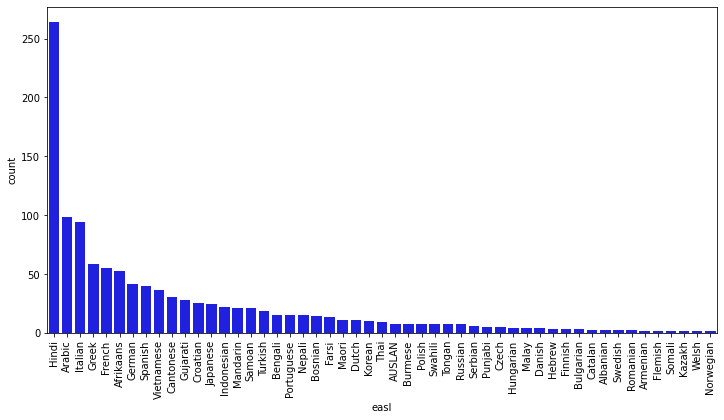

In [14]:
easl = main_data_source_A['easl'][(main_data_source_A['easl']!= "NOT_GIVEN") & (main_data_source_A['easl']!= "No other language spoken")]
#easl.value_counts()

plt.figure(figsize=(12,6))
sns.countplot(easl, order = easl.value_counts().index, color = 'b')

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);


### Time taken

Most applications take less than an hour from creation to submission. There is a very long tail of long elapsed times.

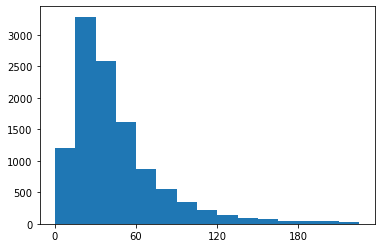

In [15]:
# Plot the histogram of time taken to complete assesment

plt.hist(main_data_source_A['timeTaken'], bins=np.arange(0,240,15))
plt.xticks(np.arange(0,240,60));

# Viewing main_data_source_B

This data shows information about the job ad posting and candidate interaction with it. There are 15 attributes.

In [16]:
main_data_source_B

prediction_id                  cohortId  \
0      5e7d7f66c918bc0100ee143b  5e7d7214726a6301000ebf7a   
1      5e7d75ebea9b790100a0523f  5e7d7214726a6301000ebf7a   
2      5e7d920eea9b790100a052b3  5e7d7214726a6301000ebf7a   
3      5e7d7de8ea9b790100a05267  5e7d7214726a6301000ebf7a   
4      5e7db162c918bc0100ee14db  5e7d7214726a6301000ebf7a   
...                         ...                       ...   
13957  5f7eed97b517f0010085acf9  5f7d70f900329401009a8702   
13958  5f8fa15647ce990100397c62  5f8c0c0b0032940100aa1be5   
13959                       NaN                       NaN   
13960                       NaN                       NaN   
13961  5f83fa64b517f0010085f642  5f7fe9e4a0619401001766bc   

                  submittedAt  customerSatisfaction_score  \
0     2020-03-27 04:21:55.867                        10.0   
1     2020-03-27 03:41:30.214                        10.0   
2     2020-03-27 05:41:32.305                         9.0   
3     2020-03-27 04:15:34.364                         8.0   
4     2020-03-27 07:55:11.775                         9.0   
...                       ...                         ...   
13957 2020-10-08 10:44:30.629                        10.0   
13958 2020-10-21 02:47:37.061                         9.0   
13959                     NaT                         NaN   
13960                     NaT                         NaN   
13961 2020-10-12 06:40:18.410                        10.0   

                        createdAt                   updatedAt     status  \
0      2020-03-27 03:00:35.334000  2020-03-27 04:21:55.883000  completed   
1      2020-03-27 03:26:58.691000  2020-03-27 03:41:30.219000  completed   
2      2020-03-27 03:57:53.980000  2020-03-27 05:41:32.309000  completed   
3      2020-03-27 03:59:12.310000  2020-03-27 04:15:34.371000  completed   
4      2020-03-27 04:40:06.430000  2020-03-27 07:55:11.779000  completed   
...                           ...                         ...        ...   
13957  2020-10-08 06:07:26.362000  2020-10-08 10:44:30.639000  completed   
13958  2020-10-21 01:57:25.266000  2020-10-21 02:47:37.066000  completed   
13959                         NaN                         NaN        NaN   
13960                         NaN                         NaN        NaN   
13961  2020-10-12 05:32:21.650000  2020-10-12 06:40:18.416000  completed   

       candidateId        jobId  recruiter_id    job_publish_date  \
0              0.0  855392262.0           NaN                 NaT   
1              0.0  855392262.0           NaN                 NaT   
2              0.0  855392262.0           NaN                 NaT   
3              0.0  855392262.0           NaN                 NaT   
4              0.0  855392262.0           NaN                 NaT   
...            ...          ...           ...                 ...   
13957  875444685.0  875274877.0   689575500.0 2020-10-07 03:43:10   
13958  821853965.0  876765085.0   100839347.0 2020-10-18 04:56:08   
13959  878219731.0  876420475.0   788150548.0 2020-10-15 01:46:23   
13960  875779929.0  875684236.0   100837856.0 2020-10-09 07:44:43   
13961  834863483.0  875613704.0   100838378.0 2020-10-09 00:47:35   

           job_close_date                    job_title recommend  \
0                     NaT   Job Listing Public Title 0        No   
1                     NaT   Job Listing Public Title 0        No   
2                     NaT   Job Listing Public Title 0       Yes   
3                     NaT   Job Listing Public Title 0       Yes   
4                     NaT   Job Listing Public Title 0       Yes   
...                   ...                          ...       ...   
13957 2020-10-09 10:55:00  Job Listing Public Title 65     Maybe   
13958 2020-10-21 10:25:00  Job Listing Public Title 65     Maybe   
13959 2020-11-07 07:55:00  Job Listing Public Title 65       NaN   
13960 2020-10-14 12:55:00  Job Listing Public Title 65       NaN   
13961 2020-10-12 10:55:00  Job Listing Public Title 65       Y

# Merging the dataframes

Merging the three files means that we can relate all the available information together.

In [17]:
# Merge the three datasets using the common predition_id index column
# Choosing to use an inner join only uses the intersection of the keys
# common to all three datasets (this will lose information on rows without
# assigned prediction ids and is a file has no reference to a key).

merged_data_AB = main_data_source_A.merge(right = main_data_source_B, how = 'inner', on = 'prediction_id' )
merged_data_OAB = product_F_CSAT.merge(right = merged_data_AB, how= 'inner', on = 'prediction_id')

del(merged_data_AB)


In [18]:
merged_data_OAB

prediction_id        comment_sentiment  polarity  \
0     5e7db162c918bc0100ee14db  Unknown Unknown Unknown  0.193182   
1     5e8139e3ea9b790100a0558d  Unknown Unknown Unknown  0.000000   
2     5e912c8be83d580100f744a9  Unknown Unknown Unknown  0.500000   
3     5e91467cf0c85c0100385476  Unknown Unknown Unknown  0.250000   
4     5e9277c3e83d580100f74695  Unknown Unknown Unknown  0.500000   
...                        ...                      ...       ...   
9322  5f9f246b47ce9901003a91f7                 positive  0.280000   
9323  5f9f60c647ce9901003a9617                 positive  0.705000   
9324  5f9f5d0f47ce9901003a95e3                 positive  0.000000   
9325  5f4760f0dd99b80100d2cc3d                 positive  0.420000   
9326  5f1bc13e731ffc0100d20733                 positive  0.162784   

                    cohortId_x             cohortName           submittedAt_x  \
0     5e7d7214726a6301000ebf7a  Job Listing Title 112 2020-03-27 07:55:11.775   
1     5e7d7214726a6301000ebf7a  Job Listing Title 112 2020-03-30 00:14:25.900   
2     5e880d91c2ce11010001815b  Job Listing Title 414 2020-04-11 02:33:45.675   
3     5e8d5ccec2ce110100021fd1  Job Listing Title 179 2020-04-11 04:24:25.774   
4     5e8e9de0c2ce11010002506b  Job Listing Title 334 2020-04-12 02:06:57.961   
...                        ...                    ...                     ...   
9322  5f923d37a0619401002b2eee  Job Listing Title 469 2020-11-01 21:10:54.517   
9323  5f9d3d87a061940100370dd6   Job Listing Title 47 2020-11-02 01:28:12.771   
9324  5f98f8850032940100b830dc  Job Listing Title 469 2020-11-02 01:12:34.667   
9325  5f4760e991d82c0100a56d43  Job Listing Title 469 2020-08-27 07:29:45.373   
9326  5f1ac1fa4568a401005678dd  Job Listing Title 469 2020-07-25 05:20:55.678   

      timeTaken Recommend  ftq_count  total_words  ...  \
0        195.09       YES          6          486  ...   
1         28.57        NO          6          196  ...   
2         31.18        NO          6          268  ...   
3         31.64        NO          6          363  ...   
4         32.87       YES          6          228  ...   
...         ...       ...        ...          ...  ...   
9322      50.99        NO          6          432  ...   
9323      90.56     MAYBE          6          508  ...   
9324      15.70       YES          6          342  ...   
9325      21.86       YES          6          437  ...   
9326      43.47     MAYBE          6          472  ...   

                       updatedAt     status  candidateId        jobId  \
0     2020-03-27 07:55:11.779000  completed          0.0  855392262.0   
1     2020-03-30 00:14:25.905000  completed          0.0  855392262.0   
2     2020-04-11 02:33:45.677000  completed          0.0  856503498.0   
3     2020-04-11 04:24:25.798000  completed          0.0  858292228.0   
4     2020-04-12 02:06:57.984000  completed          0.0  858385515.0   
...                          ...        ...          ...          ...   
9322  2020-11-01 21:10:54.524000  completed  878124142.0  877189309.0   
9323  2020-11-02 01:28:12.773000  completed  828232384.0  878143562.0   
9324  2020-11-02 01:12:34.672000  completed  330964256.0  877848873.0   
9325  2020-08-27 07:29:45.380000  completed  842905823.0  868395541.0   
9326  2020-07-25 05:20:55.693000  completed  865153723.0  865423784.0   

      recruiter_id    job_publish_date      job_close_date  \
0              NaN                 NaT                 NaT   
1              NaN                 NaT                 NaT   
2              NaN                 NaT                 NaT   
3              NaN                 NaT                 NaT   
4              NaN                 NaT                 NaT   
...            ...                 ...                 ...   
9322   846885039.0 2020-10-22 01:00:03 2021-01-30 07:55:00   
9323   789358025.0 2020-10-31 07:26:42 2020-11-04 09:55:00   
9324   826670007.0 2020-10-28 03:02:45 2020-11-03 10:55:00   
9325   100837087.0 20

In [19]:
# There are doubles in column names from merging with the same name or the same values. Remove these.

for col in ['submittedAt', 'cohortId']:
    merged_data_OAB['{}'.format(col)] = merged_data_OAB['{}_x'.format(col)].combine_first(merged_data_OAB['{}_y'.format(col)])
    merged_data_OAB = merged_data_OAB.drop(columns = ['{}_x'.format(col), '{}_y'.format(col)])
    
merged_data_OAB['recommend'] = merged_data_OAB['recommend'].combine_first(merged_data_OAB['Recommend'])    
merged_data_OAB = merged_data_OAB.drop(columns = ['Recommend'])

# Check categorical values for typos or irregularirties
merged_data_OAB['recommend'].value_counts()


Yes      4087
No       3480
Maybe    1760
Name: recommend, dtype: int64

In [20]:
merged_data_OAB['jobId'] = merged_data_OAB['jobId'].astype('str')

## Clean data for analysis

In [21]:
# change times from strings to datetimes
for date in ['submittedAt','createdAt', 'updatedAt', 'job_publish_date', 'job_close_date']:
    main_data_source_B[date] = pd.to_datetime(main_data_source_B[date])
    merged_data_OAB[date] = pd.to_datetime(merged_data_OAB[date])
#main_data_source_B


## What are the attributes saying?

### Dropout status

In [22]:
main_data_source_B['status'].value_counts()

completed      12046
dropped out      265
active             7
Name: status, dtype: int64

There are many NaN in the status column. I would guess they are drop outs too.

Assigning NaNs to "dropped out" increases the rate from 2% to 16%.

In [23]:
main_data_source_B['status'][main_data_source_B['status'].isna()] = 'dropped out';
main_data_source_B['status'].value_counts()

completed      12046
dropped out     1909
active             7
Name: status, dtype: int64

### Customer satisfaction scores

10.0    7011
9.0     2170
7.0     1310
8.0     1287
5.0      145
6.0       69
4.0       16
3.0       11
2.0        6
1.0        5
0.0        2
Name: customerSatisfaction_score, dtype: int64

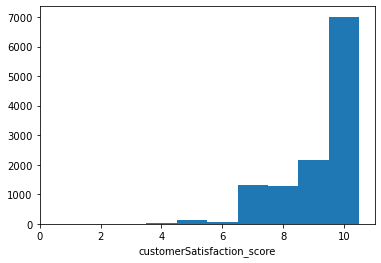

In [24]:
# check for errors in customer satisfaction scores
plt.hist(main_data_source_B['customerSatisfaction_score'], bins = np.arange(0.5,11.5))
plt.xlabel('customerSatisfaction_score')
main_data_source_B['customerSatisfaction_score'].value_counts()

### Submissions over time

In [25]:
main_data_source_B['submittedAt'].max() - main_data_source_B['submittedAt'].min() 
bins_B = pd.date_range(main_data_source_B['submittedAt'].min().date(), main_data_source_B['submittedAt'].max().date())

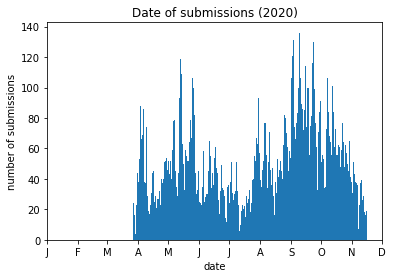

In [26]:
plt.hist(main_data_source_B['submittedAt'], bins= bins_B)
plt.xticks([datetime(2020,m,1) for m in range(1,12+1)], ['J','F','M','A','M','J','J','A','S','O','N','D']);
plt.xlabel('date')
plt.ylabel('number of submissions')
plt.title('Date of submissions (2020)');

This time series shows how many new FirstInterviews were submitted each day of 2020.

There is likely a strong weekly cycle due to the work week.

It is very low during winter. It is unclear whether this happens every year or if it is an effect of COVID.

There is a stronger pick up around September, probably a sign of recovery of people and the economy from lockdowns. The decrease at the end of the year may be due to holidays and/or incomplete data. 

### Job types (job_title and jodId)

Different job roles are likely to have different characteristics. 

For the following analysis I have selected the most common job title to look at its characterisitcs in more depth.

For one job title (eg nurse), there are many different jodIds (eg different positions at different hospitals).

(A similar analysis could be done on different jobIds from the same recruiter, if a recruiter wanted an analysis on all their job positions/candidates.)

In [27]:
# see how many job titles there are. If there are jobs with only small amounts of data they will not give good stats
main_data_source_B['job_title'].value_counts()

Job Listing Public Title 65    9756
Job Listing Public Title 0     2988
Job Listing Public Title 2      506
Job Listing Public Title 8      142
Job Listing Public Title 60      92
Job Listing Public Title 69      74
Job Listing Public Title 45      67
Job Listing Public Title 9       51
Job Listing Public Title 41      47
Job Listing Public Title 13      43
Job Listing Public Title 11      20
Job Listing Public Title 3       18
Job Listing Public Title 53      18
Job Listing Public Title 50      13
Job Listing Public Title 70      13
Job Listing Public Title 10      12
Job Listing Public Title 35      10
Job Listing Public Title 36       7
Job Listing Public Title 64       7
Job Listing Public Title 34       7
Job Listing Public Title 32       7
Job Listing Public Title 67       6
Job Listing Public Title 62       5
Job Listing Public Title 7        5
Job Listing Public Title 74       5
Job Listing Public Title 29       4
Job Listing Public Title 30       4
Job Listing Public Title 28 

In [28]:
# Are job_title and jobId the same? how can this different information be used? 

main_data_source_B['jobId'].value_counts()

856930675.0    112
870885479.0    105
865072021.0    100
856503498.0     93
867366535.0     88
              ... 
860303013.0      1
860250308.0      1
860166221.0      1
876915764.0      1
855655290.0      1
Name: jobId, Length: 1087, dtype: int64

There are many jobId for the one job_title. 

The following analysis used the most common job title "Job Listing Public Title 65".

Let's see how many jobs there are and select the jobs with many applications.

# Which candidates dropout?

To improve interview completion rates, I explored why a candidate may abandon the interview by looking at main_data_source_B.

Differences between completed and abandoned interviews may provide insights to improve completion rates.

## Are there different dropout ratios for different jobs of the same role?

To see this the drop-out and completed statuses are compared for 10 of the most popular jobs for "Job Listing Public Title 65".


In [29]:
# There are many jobId for the one job_title. Let's see how many jobs there are and select the jobs with many applications.

job_65 = main_data_source_B[main_data_source_B['job_title']=="Job Listing Public Title 65"]
jobId_value_counts =job_65['jobId'].value_counts()
jobId_value_counts

870885479.0    105
865072021.0    100
865423784.0     87
861642113.0     82
865781994.0     80
              ... 
865066778.0      1
865022059.0      1
864820376.0      1
864352181.0      1
878843348.0      1
Name: jobId, Length: 709, dtype: int64

There are many jobIds with fewer than 20 candidates. The most candidates for one jobId is about 100.

Text(0.5, 0, 'jobId')

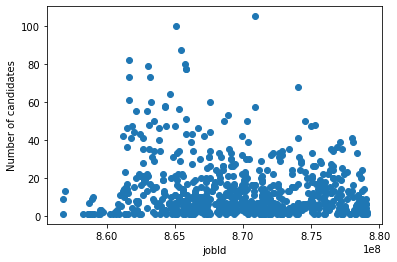

In [30]:
x = jobId_value_counts.index
y = jobId_value_counts.values

plt.scatter(x,y)
plt.ylabel("Number of candidates")
plt.xlabel("jobId")

In [31]:
#select the n most popular jobId for job 65
n=10
pop_jobs = job_65['jobId'].value_counts().index[0:n]
#pop_jobs

In [32]:
# Create a subset dataframe of these ten jobs for the one role by matching the jobIds
top_10_job_65 = job_65[job_65['jobId'].isin(pop_jobs)];

# The jobId is a numerical value, but has no numerical use here, so I convert it to a string
top_10_job_65['jobId'] = top_10_job_65['jobId'].astype('str');
data = top_10_job_65

The figure below shows the number of completed and dropped out applications for ten jobs of the same role.

Choosing to compare different jobs for the same role should control for variation between industries and roles.

The figure shows that the proportion of dropped out applications changes between different jobs.

jobId 861642113 has the most drop-outs (26%) and the fewest completed applications of this sample. This indicates that the application process may be too intimidating and should be reviewed.

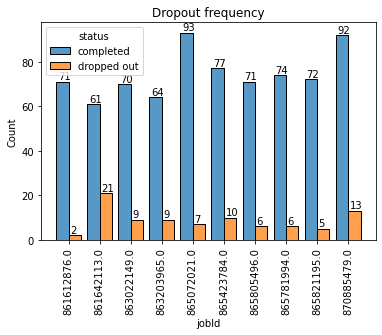

In [33]:
ax = sns.histplot(
    data = top_10_job_65,
    x = 'jobId',
    hue = 'status',
    multiple = 'dodge',
    shrink = 0.8
)

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title("Dropout frequency")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+1))

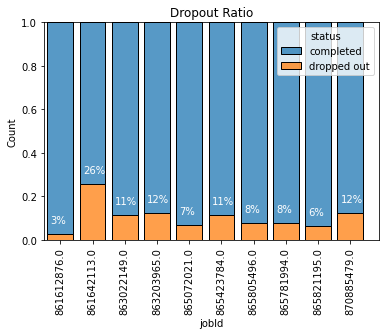

In [34]:
ax = sns.histplot(
    data = top_10_job_65,
    x = 'jobId',
    hue = 'status',
    multiple = 'fill',
    shrink = 0.8
)

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title("Dropout Ratio")

for p in ax.patches[0:10]:
    ax.annotate("{:.0%}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.05), color = 'w')


# Is there a relationship between customer satisfaction and job?

This plot uses the same ten jobs as above. 

Most of the jobs have very high satisfaction ratings between 9 and 10. 

Recommended candidates tend to have higher satisfaction than non-recommended candidates.

Significantly, the least satisfied candidates are from jobId 863203965. All candidates, regardless of their recommendation, are least satisfied. From this information, this job should investigate how to improve their customer satisfation. Interestingly, this job does not have an extreme drop-out rate and has a high rate of recommendation versus no recommendation. The low rate of "No" recommendation could also be a problem in that the application process does not efficiently select a shortlist of candidates.

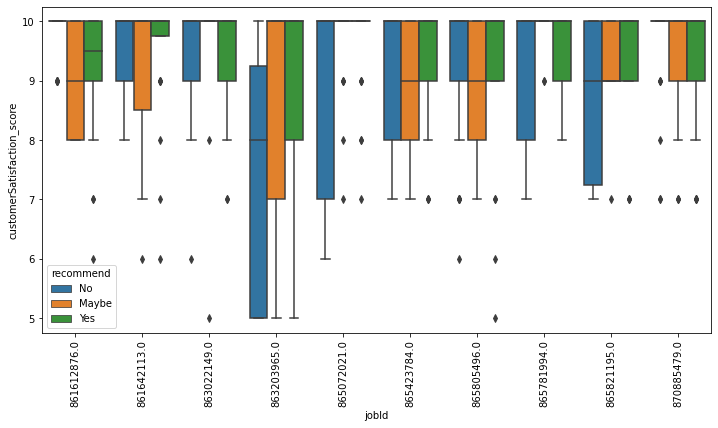

In [35]:
plt.figure(figsize=(12,6))

sns.boxplot(x='jobId', 
            y='customerSatisfaction_score',
            hue='recommend',
            hue_order=['No', 'Maybe', 'Yes'],
            data = top_10_job_65,
           )

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

## JobId vs recommendation

The FirstInterview should be able to make a good shortlist of candidates. 

This should result in separating the candidates into "yes", "no", and "maybe" categories.

The plot below shows the proportion of recommendations from FirstInterview for ten jobIds.

jobId 863203965 (fourth from the left) has a very low "no" proportion of less than 20%. This is concerning because it does not substantially reduce the candidates for that job. Coupled with the lower customer satisfation score from above, I would suggest that the FirstInterview process for this job needs to be reviewed.

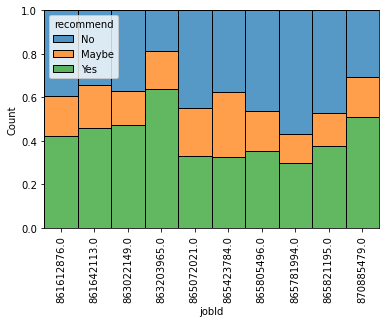

In [36]:
sns.histplot(
    data = top_10_job_65,
    x = 'jobId',
    hue = 'recommend',
    hue_order=['No', 'Maybe', 'Yes'],
    multiple = 'fill',
)

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

In [37]:
# Create a subset dataframe of these ten jobs for the one role by matching the jobIds for role 65
top_job_65 = merged_data_OAB[merged_data_OAB['jobId'].isin(pop_jobs.astype('str'))]


## Gender

The following shows a breakdown of the top ten roles in terms of gender ratio.

Some jobs attract more male than female candidates, other jobs do the opposite. 

If this is not the intention of the recruiters, I would recommend seeing how to attract more of a balance in genders so that no gender is being disadvantaged. This is especially for jobId 861612876 and 865072021 (first and fifth from the left).

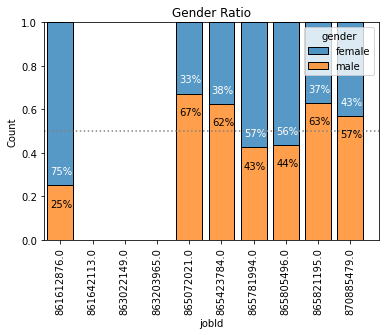

In [38]:
ax = sns.histplot(data = top_job_65, 
                  x = 'jobId', 
                  hue = 'gender', 
                  multiple = 'fill', 
                  shrink = 0.8 
                 )

locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
plt.title("Gender Ratio")
plt.axhline(0.5, color='grey', ls=':')

for p in ax.patches[0:10]:
    ax.annotate("{:.0%}".format(p.get_height()), (p.get_x()+0.1, p.get_height()-0.1), color = 'k')
    
for p in ax.patches[10:20]:
    ax.annotate("{:.0%}".format(p.get_height()), (p.get_x()+0.1, 1- p.get_height()+0.05), color = 'w')
    

## Personality vs recommended

The following section looks at personality.

First we look at how well the personality attributes separate recommended candidates of the top 3 jobs from "Job Listing Public Title 65".

Greatest separation is in 'trait_team_player_percentile', 'trait_self_aware_percentile', 'trait_resourceful_percentile', 'trait_drive_percentile', 'trait_critical_thinking_percentile', and 'trait_accountability_percentile'.

Recommended canditates tend to be greater in the following traits:
* team player, 
* self-aware, 
* resourceful, 
* drive,
* critical thinking, and 
* accountability.
       
There are significant correlations between some personality traits (shown by the diagonal clustering) such as resourcefulness and drive.

<Figure size 864x864 with 0 Axes>

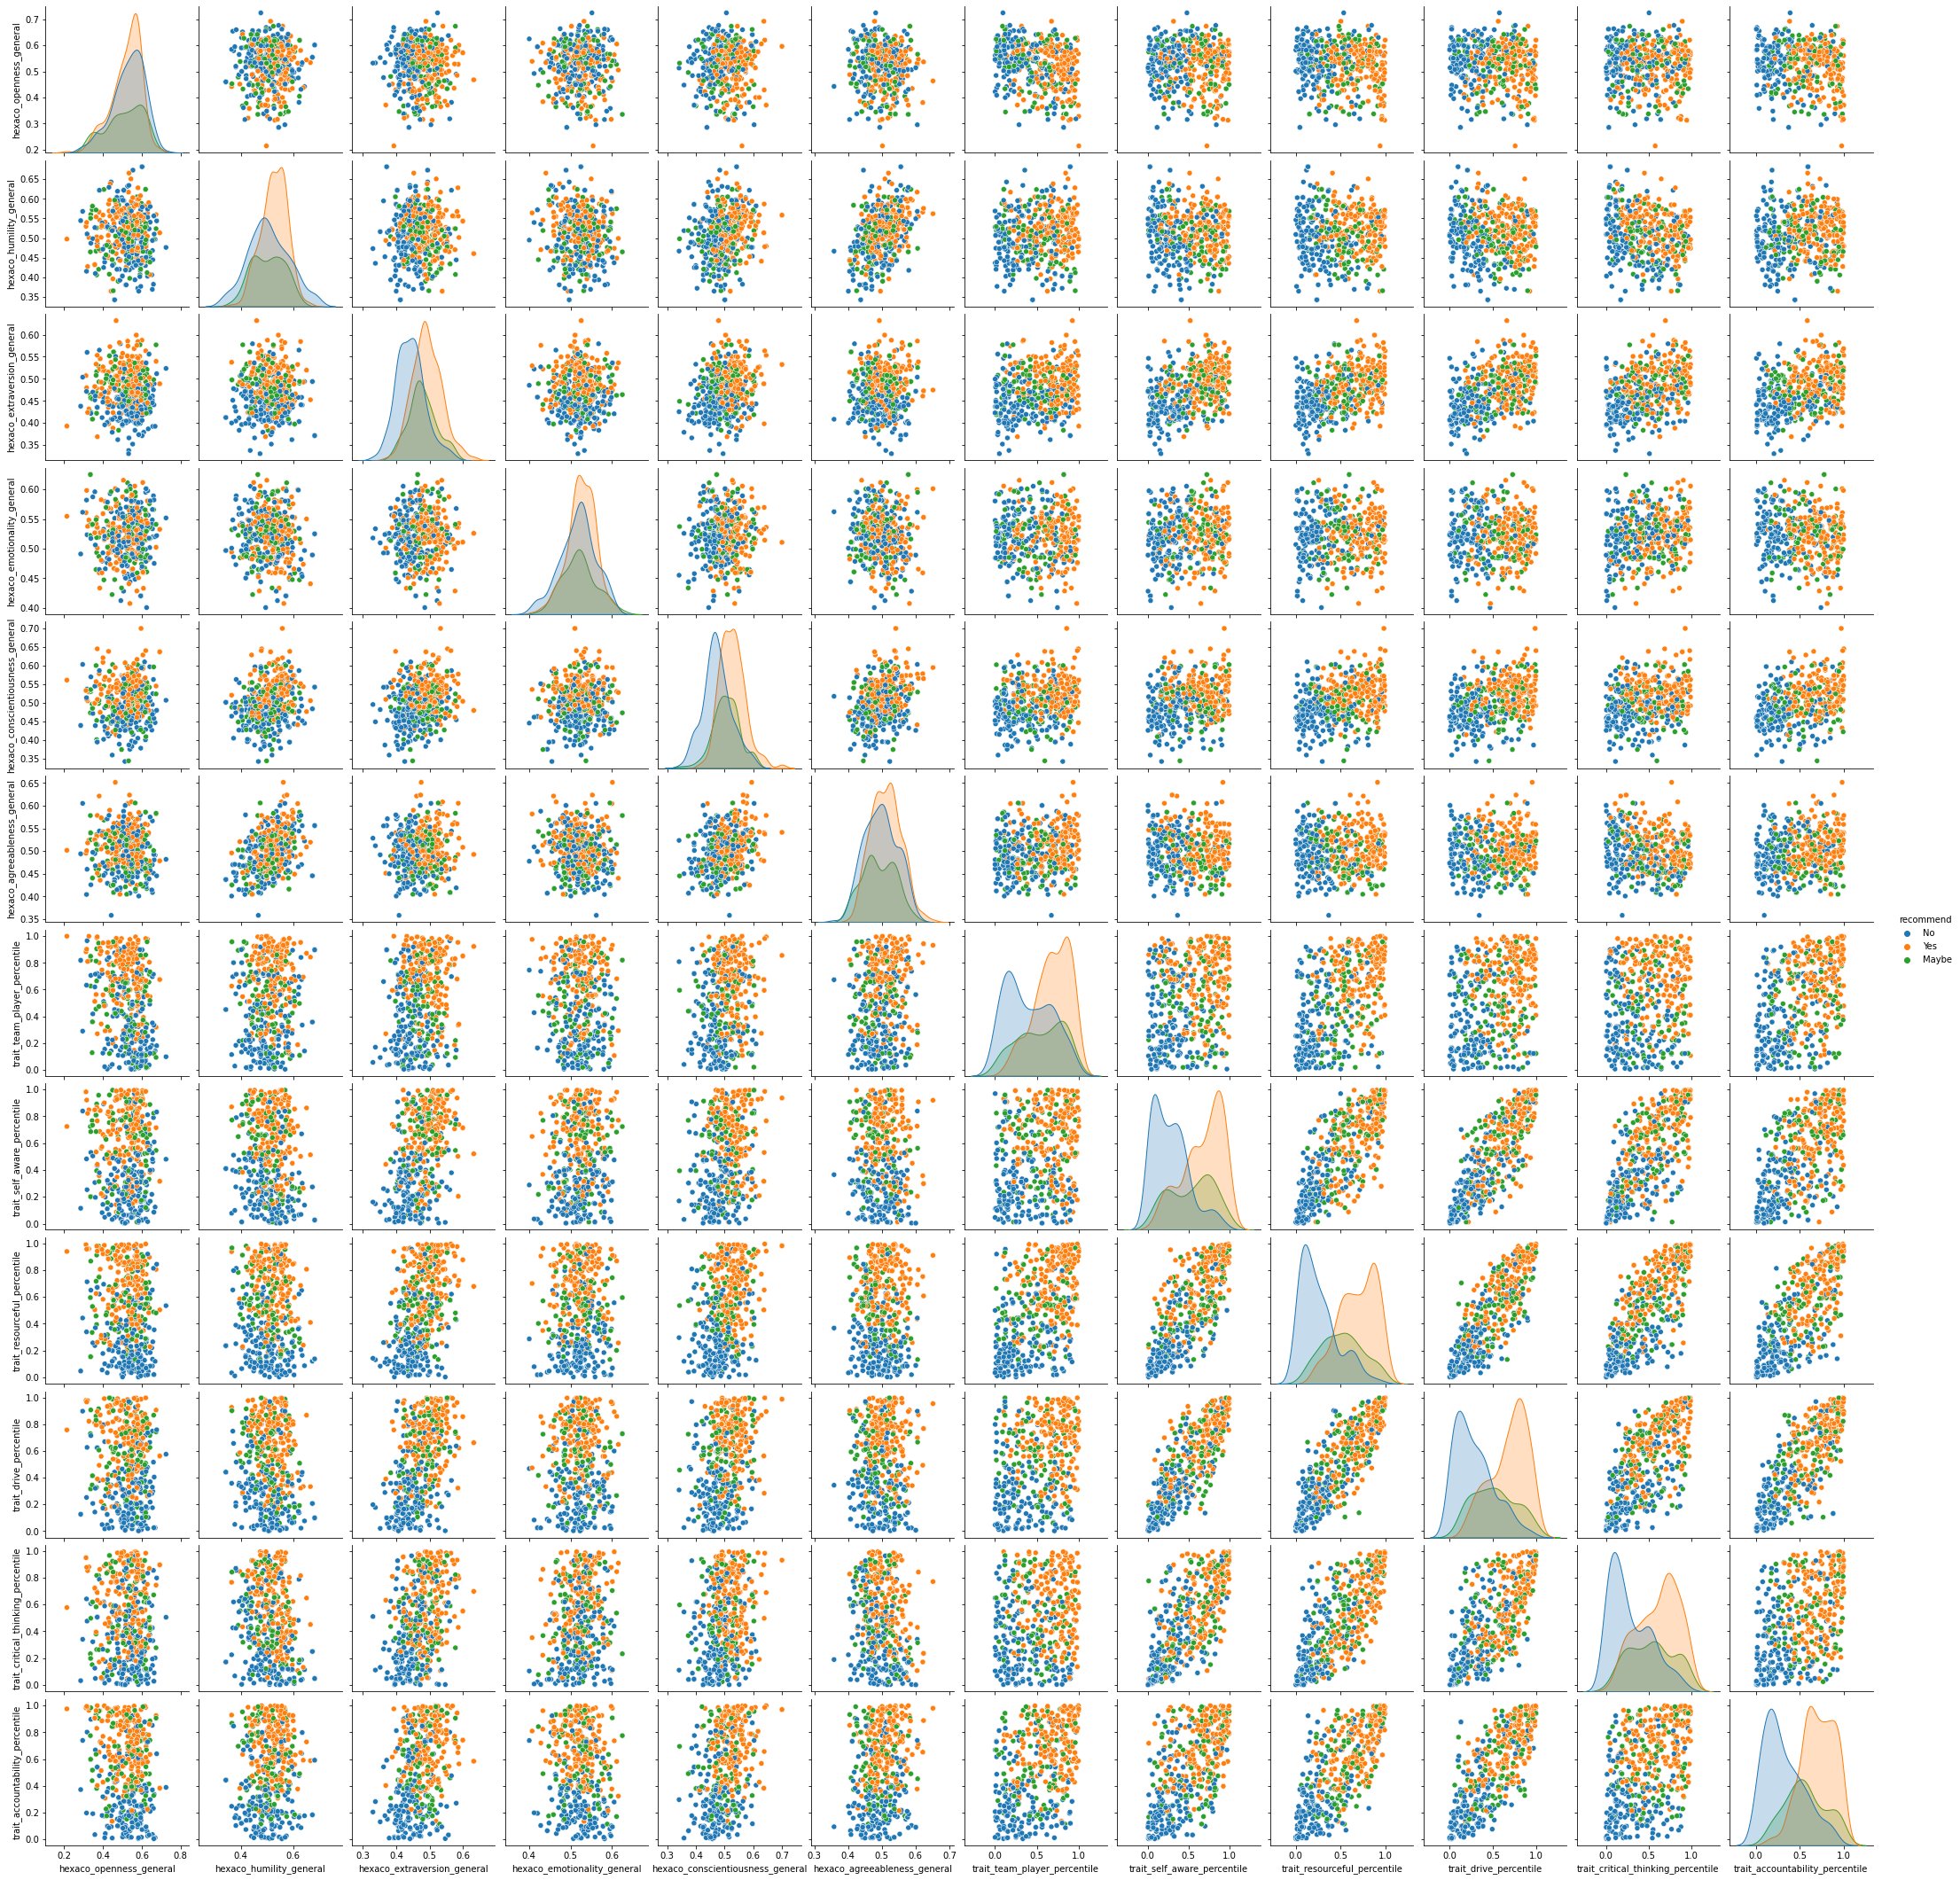

In [39]:
# plot how personal traits relate to each other and how recommended and non-recommended candidates compare 
personality = ['gender', 'hexaco_openness_general',
       'hexaco_humility_general', 'hexaco_extraversion_general',
       'hexaco_emotionality_general', 'hexaco_conscientiousness_general',
       'hexaco_agreeableness_general', 'easl', 'trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile', 'jobId',
        'recommend',]

plt.figure(figsize=(12,12))
sns.pairplot(data = top_job_65[personality], hue='recommend', palette=sns.color_palette("tab10",3))

## Personality versus jobId

Next, we look at if different jobs have attracted different personalities, focusing on the personality traits which were more important of separating recommendations (above). 

This is briefly looking at the top three jobs: 
* 870885479 (green)
* 865072021 (blue)
* 865423784 (orange)


865072021 (blue) does not attract team players, 870885479 (green) does attract team players.
I would recommend 865072021 (blue) to try to attract more team players.

865423784 (orange) doesn't attract as much resourcefulness than the others.
Critical thinking is much weaker for 865423784 (orange) than 865072021 (blue).

 870885479 (green) tend to attract less self-aware personalilities than average. 

In [40]:
#select the n most popular jobId for job 65
pop_3_jobs = job_65['jobId'].value_counts().index[0:3].astype('str')
#pop_jobs
top_3_job_65 = merged_data_OAB[merged_data_OAB['jobId'].isin(pop_3_jobs)]

# these are the top three jobs
top_3_job_65['jobId'].value_counts()

870885479.0    91
865072021.0    89
865423784.0    69
Name: jobId, dtype: int64

<Figure size 864x864 with 0 Axes>

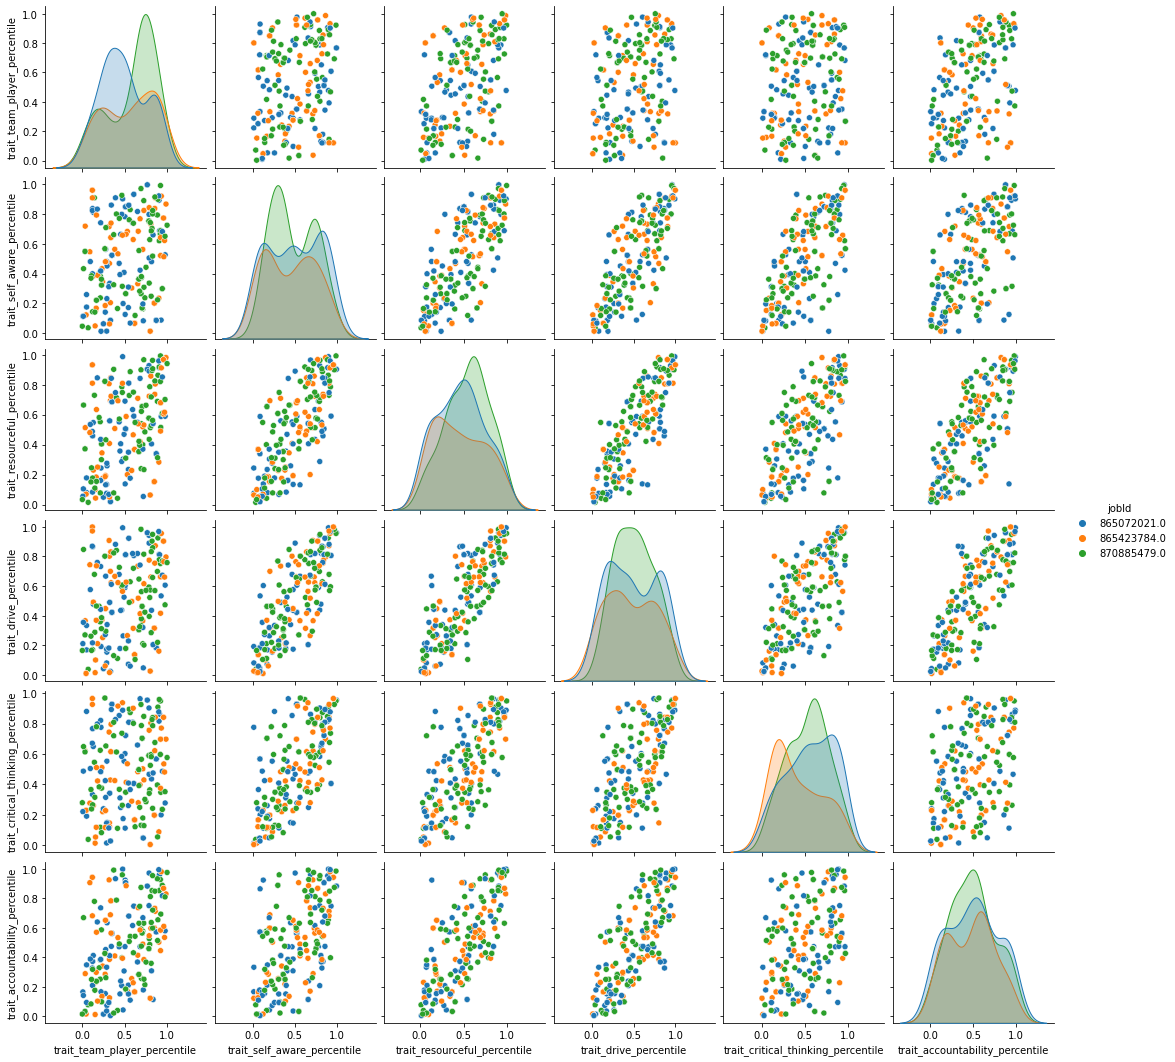

In [41]:
# plot the personalities of candidates for the top three jobs
data = top_3_job_65

personality = ['gender', 'trait_team_player_percentile',
       'trait_self_aware_percentile', 'trait_resourceful_percentile',
       'trait_drive_percentile', 'trait_critical_thinking_percentile',
       'trait_accountability_percentile', 'jobId',
        'recommend',]

plt.figure(figsize=(12,12))
sns.pairplot(data[personality], hue='jobId', palette=sns.color_palette("tab10",3))